# Start cleaning dataframe

In [138]:
import pickle
with open('CatFoodList.pickle','rb') as read_file:
    cat_list = pickle.load(read_file)

In [139]:
with open('DogFoodList.pickle','rb') as read_file:
    dog_list = pickle.load(read_file)

In [140]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [141]:
cat_list['Pet'] = 1 # cat = 1
dog_list['Pet'] = 0 # dog = 0 

In [142]:
food_list= pd.concat([dog_list,cat_list],ignore_index=True)

In [143]:
# transform 'Weight' column
weight = []
for i in food_list.Weight_lbs:
    try:
        i = float(i)
        weight.append(i)
    except:
        weight.append(None)
food_list['Weight'] = weight
del food_list['Weight_lbs']

In [144]:
# change data type
food_list.Price = pd.to_numeric(food_list.Price)
food_list.Fat_min = pd.to_numeric(food_list.Fat_min)
food_list.Fiber_max = pd.to_numeric(food_list.Fiber_max)
food_list.Moisture_max = pd.to_numeric(food_list.Moisture_max)
food_list.Protein_min = pd.to_numeric(food_list.Protein_min)
food_list.Weight = pd.to_numeric(food_list.Weight)
food_list.ReviewNum = pd.to_numeric(food_list.ReviewNum)

In [145]:
food_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6595 entries, 0 to 6594
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   RecommendationScore  6595 non-null   float64
 1   ReviewNum            6595 non-null   int64  
 2   ProductTitle         6595 non-null   object 
 3   ItemNumber           6595 non-null   object 
 4   Price                6594 non-null   float64
 5   Brand                6595 non-null   object 
 6   FoodForm             6595 non-null   object 
 7   LifeStage            6595 non-null   object 
 8   SpecialDiet          5340 non-null   object 
 9   Protein_min          5820 non-null   float64
 10  Fat_min              5794 non-null   float64
 11  Moisture_max         5782 non-null   float64
 12  Fiber_max            5825 non-null   float64
 13  Pet                  6595 non-null   int64  
 14  Weight               4707 non-null   float64
dtypes: float64(7), int64(2), object(6)
mem

In [146]:
# Get a new variable 'PricePerPound'
food_list['PricePerPound'] = food_list['Price']/food_list['Weight']

In [147]:
food_list.head(5)

,RecommendationScore,ReviewNum,ProductTitle,ItemNumber,Price,Brand,FoodForm,LifeStage,SpecialDiet,Protein_min,Fat_min,Moisture_max,Fiber_max,Pet,Weight,PricePerPound
0,94.0,2676,American Journey Salmon & Sweet Potato Recipe ...,108423,42.99,American Journey,Dry Food,Adult,"Grain-Free, No Corn No Wheat No Soy, Gluten Fr...",32.0,14.0,10.0,5.0,0,24.0,1.791250
1,95.0,295,Moist & Meaty Burger with Cheddar Cheese Flavo...,100187,15.99,Moist & Meaty,Dry Food,Adult,None,18.0,7.0,33.0,3.0,0,13.5,1.184444
2,96.0,854,Blue Buffalo Life Protection Formula Small Bre...,46874,32.98,Blue Buffalo,Dry Food,Adult,No Corn No Wheat No Soy,26.0,15.0,10.0,4.0,0,15.0,2.198667
3,100.0,19,American Journey Healthy Weight Salmon & Sweet...,183120,48.99,American Journey,Dry Food,Adult,"Grain-Free, No Corn No Wheat No Soy, Weight Co...",30.0,9.0,10.0,9.0,0,24.0,2.041250
4,95.0,3310,Taste of the Wild High Prairie Grain-Free Dry ...,154551,48.99,Taste of the Wild,Dry Food,Adult,"Grain-Free, Gluten Free",32.0,18.0,10.0,4.0,0,NaN,NaN


# Check missing values

In [148]:
# Remove products with 0 reviews (no reviews = no recommendation score)
food_list = food_list[food_list.ReviewNum != 0]

In [149]:
# one item without price is unavailable on Chewy; removed
food_list = food_list[food_list.Price.notna()]

In [150]:
food_list.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6260 entries, 0 to 6593
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   RecommendationScore  6260 non-null   float64
 1   ReviewNum            6260 non-null   int64  
 2   ProductTitle         6260 non-null   object 
 3   ItemNumber           6260 non-null   object 
 4   Price                6260 non-null   float64
 5   Brand                6260 non-null   object 
 6   FoodForm             6260 non-null   object 
 7   LifeStage            6260 non-null   object 
 8   SpecialDiet          5085 non-null   object 
 9   Protein_min          5594 non-null   float64
 10  Fat_min              5566 non-null   float64
 11  Moisture_max         5490 non-null   float64
 12  Fiber_max            5527 non-null   float64
 13  Pet                  6260 non-null   int64  
 14  Weight               4443 non-null   float64
 15  PricePerPound        4443 non-null   f

In [151]:
food_list.describe()

,RecommendationScore,ReviewNum,Price,Protein_min,Fat_min,Moisture_max,Fiber_max,Pet,Weight,PricePerPound
count,6260.000000,6260.000000,6260.000000,5594.000000,5566.000000,5490.000000,5527.000000,6260.000000,4443.000000,4443.000000
mean,90.125879,96.023962,34.430562,20.100748,9.236112,47.932949,2.780284,0.419649,11.052595,11.833476
std,10.355009,165.519809,20.370620,15.230387,8.117962,35.301262,3.328410,0.493541,10.249814,27.304577
min,20.000000,1.000000,1.990000,0.000000,0.000000,0.100000,0.000000,0.000000,0.046875,0.459800
25%,87.000000,14.000000,18.990000,9.000000,3.500000,10.000000,1.000000,0.000000,3.500000,2.539437
50%,93.000000,42.000000,30.990000,12.000000,6.500000,78.000000,1.800000,0.000000,8.250000,3.999600
75%,97.000000,109.000000,44.990000,29.000000,14.000000,80.000000,4.000000,1.000000,15.950000,7.012525
max,100.000000,3310.000000,218.990000,218.040000,99.900000,100.000000,156.355000,1.000000,50.000000,328.754717


In [152]:
food_list.replace(to_replace=[None], value=np.nan, inplace=True)

# Make Life Stage Categories (Divide 3 life stages into 3 columns)

In [153]:
food_list.LifeStage.value_counts()

Adult                    5347
Puppy                     246
Adult, All Lifestages     214
Senior                    164
Kitten                    100
Adult, Senior, Puppy       49
Adult, Puppy               49
Adult, Senior              29
Adult, Kitten              26
Senior, Adult              14
Kitten, Adult              11
All Lifestages              4
Puppy, All Lifestages       4
Adult, Puppy, Senior        3
Name: LifeStage, dtype: int64

In [154]:
# make three columns: Adult, Senior, PuppyOrKitten

food_list.loc[food_list.LifeStage == 'Adult', 'Adult'] = 1

food_list.loc[food_list.LifeStage == 'Puppy', 'PuppyOrKitten'] = 1

food_list.loc[food_list.LifeStage == 'Adult, All Lifestages', 'Adult'] = 1
food_list.loc[food_list.LifeStage == 'Adult, All Lifestages', 'PuppyOrKitten'] = 1
food_list.loc[food_list.LifeStage == 'Adult, All Lifestages', 'Senior'] = 1

food_list.loc[food_list.LifeStage == 'Senior', 'Senior'] = 1

food_list.loc[food_list.LifeStage == 'Kitten', 'PuppyOrKitten'] = 1

food_list.loc[food_list.LifeStage == 'Adult, Senior, Puppy', 'Adult'] = 1
food_list.loc[food_list.LifeStage == 'Adult, Senior, Puppy', 'PuppyOrKitten'] = 1
food_list.loc[food_list.LifeStage == 'Adult, Senior, Puppy', 'Senior'] = 1

food_list.loc[food_list.LifeStage == 'Adult, Puppy', 'Adult'] = 1
food_list.loc[food_list.LifeStage == 'Adult, Puppy', 'PuppyOrKitten'] = 1

food_list.loc[food_list.LifeStage == 'Adult, Senior', 'Adult'] = 1
food_list.loc[food_list.LifeStage == 'Adult, Senior', 'Senior'] = 1

food_list.loc[food_list.LifeStage == 'Adult, Kitten', 'Adult'] = 1
food_list.loc[food_list.LifeStage == 'Adult, Kitten', 'PuppyOrKitten'] = 1

food_list.loc[food_list.LifeStage == 'Senior, Adult', 'Adult'] = 1
food_list.loc[food_list.LifeStage == 'Senior, Adult', 'Senior'] = 1

food_list.loc[food_list.LifeStage == 'Kitten, Adult', 'Adult'] = 1
food_list.loc[food_list.LifeStage == 'Kitten, Adult', 'PuppyOrKitten'] = 1

food_list.loc[food_list.LifeStage == 'Puppy, All Lifestages', 'Adult'] = 1
food_list.loc[food_list.LifeStage == 'Puppy, All Lifestages', 'PuppyOrKitten'] = 1
food_list.loc[food_list.LifeStage == 'Puppy, All Lifestages', 'Senior'] = 1

food_list.loc[food_list.LifeStage == 'All Lifestages', 'Adult'] = 1
food_list.loc[food_list.LifeStage == 'All Lifestages', 'PuppyOrKitten'] = 1
food_list.loc[food_list.LifeStage == 'All Lifestages', 'Senior'] = 1

food_list.loc[food_list.LifeStage == 'Adult, Puppy, Senior ', 'Adult'] = 1
food_list.loc[food_list.LifeStage == 'Adult, Puppy, Senior ', 'PuppyOrKitten'] = 1
food_list.loc[food_list.LifeStage == 'Adult, Puppy, Senior ', 'Senior'] = 1

food_list['Adult'].fillna(0, inplace=True)
food_list['PuppyOrKitten'].fillna(0, inplace=True)
food_list['Senior'].fillna(0, inplace=True)

# Make Food Form Columns (8 forms)

In [155]:
# some items may have multiple food forms (e.g. freeze-dried and food topping)

for index, row in food_list.iterrows():
    FoodForm = row['FoodForm']
    food_list.at[index,'Treats'] = re.search('Treats',FoodForm)
    food_list.at[index,'DryFood'] = re.search('Dry Food',FoodForm)
    food_list.at[index,'WetFood'] = re.search('Wet Food',FoodForm)
    food_list.at[index,'FreezeDried'] = re.search('Freeze-Dried',FoodForm)
    food_list.at[index,'FoodTopping'] = re.search('Food Topping',FoodForm)
    food_list.at[index,'Dehydrated'] = re.search('Dehydrated',FoodForm) 
    food_list.at[index,'AirDried'] = re.search('Air-Dried',FoodForm)
    food_list.at[index,'Frozen'] = re.search('Frozen',FoodForm)

In [156]:
def clean_food_form(form):
    try:
        form.group(0)
        return 1
    except:
        return 0
food_list['Treats'] = food_list.Treats.apply(clean_food_form)
food_list['DryFood'] = food_list.DryFood.apply(clean_food_form)
food_list['WetFood'] = food_list.WetFood.apply(clean_food_form)
food_list['FreezeDried'] = food_list.FreezeDried.apply(clean_food_form)
food_list['FoodTopping'] = food_list.FoodTopping.apply(clean_food_form)
food_list['Dehydrated'] = food_list.Dehydrated.apply(clean_food_form)
food_list['AirDried'] = food_list.AirDried.apply(clean_food_form)
food_list['Frozen'] = food_list.Frozen.apply(clean_food_form)

In [157]:
food_list.columns

Index(['RecommendationScore', 'ReviewNum', 'ProductTitle', 'ItemNumber',
       'Price', 'Brand', 'FoodForm', 'LifeStage', 'SpecialDiet', 'Protein_min',
       'Fat_min', 'Moisture_max', 'Fiber_max', 'Pet', 'Weight',
       'PricePerPound', 'Adult', 'PuppyOrKitten', 'Senior', 'Treats',
       'DryFood', 'WetFood', 'FreezeDried', 'FoodTopping', 'Dehydrated',
       'AirDried', 'Frozen'],
      dtype='object')

In [158]:
food_list['check'] = (food_list['Treats'] +food_list['DryFood']+food_list['WetFood']+food_list['FreezeDried']+
                      food_list['FoodTopping']+food_list['Dehydrated']+ food_list['AirDried'] + food_list['Frozen'])

In [159]:
# powder and supplement are not included
food_list.drop(index = 2985, inplace = True)
food_list.drop(index = 3045, inplace = True)
food_list.drop(index = 6423	, inplace = True)

In [160]:
del food_list['check']

# Make brand categories

In [161]:
len(food_list.Brand.unique())

242

In [162]:
# make brand categories according to numbers of items listed by the brand; amount of items in each category is the same
# merge different product lines into single brand
food_list.loc[food_list.Brand == "Hill's Prescription Diet", 'Brand'] = "Hill's"
food_list.loc[food_list.Brand == "Hill's Science Diet", 'Brand'] = "Hill's"
food_list.loc[food_list.Brand == "Purina Pro Plan", 'Brand'] = "Purina"
food_list.loc[food_list.Brand == "Purina Beneful", 'Brand'] = "Purina"
food_list.loc[food_list.Brand == "Purina ONE", 'Brand'] = "Purina"
food_list.loc[food_list.Brand == "Purina Beyond", 'Brand'] = "Purina"
food_list.loc[food_list.Brand == "Purina Pro Plan Veterinary Diets", 'Brand'] = "Purina"
food_list.loc[food_list.Brand == "Purina Muse", 'Brand'] = "Purina"
food_list.loc[food_list.Brand == "Purina Bella", 'Brand'] = "Purina"
food_list.loc[food_list.Brand == "Royal Canin Veterinary Diet", 'Brand'] = "Royal Canin"
food_list.loc[food_list.Brand == "Tiki Cat", 'Brand'] = "Tiki"
food_list.loc[food_list.Brand == "Tiki Dog", 'Brand'] = "Tiki"
food_list.loc[food_list.Brand == "Blue Buffalo Natural Veterinary Diet", 'Brand'] = "Blue Buffalo"

In [163]:
len(food_list.Brand.unique())

232

In [164]:
brand_list = pd.DataFrame(food_list.Brand.value_counts()).sort_values(by = 'Brand', ascending=False)
brand_list['Brand_cumsum'] = brand_list['Brand'].cumsum()
brand_list.head(5)

,Brand,Brand_cumsum
Purina,447,447
Blue Buffalo,309,756
Royal Canin,278,1034
Hill's,272,1306
Wellness,213,1519


In [165]:
BrandOne = brand_list[brand_list['Brand_cumsum'] <= 1500]
len(BrandOne)

4

In [166]:
BrandTwo = brand_list[(brand_list['Brand_cumsum'] <= 3000) & (brand_list['Brand_cumsum'] > 1500)]
len(BrandTwo)

14

In [167]:
BrandThree = brand_list[(brand_list['Brand_cumsum'] <= 4500) & (brand_list['Brand_cumsum'] > 3000)]
len(BrandThree)

28

In [168]:
BrandFour = brand_list[brand_list['Brand_cumsum'] > 4500]
len(BrandFour)

186

In [169]:
def brand_group(BrandName):
    if BrandName in list(BrandOne.index):
        return 'BrandGroup1'
    elif BrandName in list(BrandTwo.index):
        return 'BrandGroup2'
    elif BrandName in list(BrandThree.index):
        return 'BrandGroup3'
    elif BrandName in list(BrandFour.index):
        return 'BrandGroup4'
food_list['BrandGroup'] = food_list.Brand.apply(brand_group)
food_list.BrandGroup.value_counts()

BrandGroup4    1782
BrandGroup2    1658
BrandGroup3    1511
BrandGroup1    1306
Name: BrandGroup, dtype: int64

# Fill missing values

Since different food types would have significantly different price per pound and nutritional content, the NaNs are filled by medians of food types.

In [170]:
food_list_clean = food_list.copy()

In [171]:
del food_list_clean['ProductTitle']
del food_list_clean['FoodForm']
del food_list_clean['SpecialDiet']
del food_list_clean['LifeStage']

In [172]:
food_list_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6257 entries, 0 to 6593
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   RecommendationScore  6257 non-null   float64
 1   ReviewNum            6257 non-null   int64  
 2   ItemNumber           6257 non-null   object 
 3   Price                6257 non-null   float64
 4   Brand                6257 non-null   object 
 5   Protein_min          5594 non-null   float64
 6   Fat_min              5566 non-null   float64
 7   Moisture_max         5489 non-null   float64
 8   Fiber_max            5526 non-null   float64
 9   Pet                  6257 non-null   int64  
 10  Weight               4443 non-null   float64
 11  PricePerPound        4443 non-null   float64
 12  Adult                6257 non-null   float64
 13  PuppyOrKitten        6257 non-null   float64
 14  Senior               6257 non-null   float64
 15  Treats               6257 non-null   i

In [173]:
food_list_clean.describe()

,RecommendationScore,ReviewNum,Price,Protein_min,Fat_min,Moisture_max,Fiber_max,Pet,Weight,PricePerPound,...,PuppyOrKitten,Senior,Treats,DryFood,WetFood,FreezeDried,FoodTopping,Dehydrated,AirDried,Frozen
count,6257.000000,6257.000000,6257.000000,5594.000000,5566.000000,5489.000000,5526.000000,6257.000000,4443.000000,4443.000000,...,6257.000000,6257.000000,6257.000000,6257.000000,6257.000000,6257.000000,6257.000000,6257.000000,6257.000000,6257.000000
mean,90.121144,96.068883,34.434290,20.100748,9.236112,47.940224,2.779339,0.419690,11.052595,11.833476,...,0.112354,0.076394,0.063928,0.338821,0.518140,0.084226,0.073837,0.016781,0.004635,0.003037
std,10.355233,165.546771,20.374726,15.230387,8.117962,35.300362,3.327970,0.493548,10.249814,27.304577,...,0.315827,0.265649,0.244645,0.473347,0.499711,0.277748,0.261527,0.128461,0.067927,0.055026
min,20.000000,1.000000,1.990000,0.000000,0.000000,0.100000,0.000000,0.000000,0.046875,0.459800,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,87.000000,14.000000,18.990000,9.000000,3.500000,10.000000,1.000000,0.000000,3.500000,2.539437,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,93.000000,42.000000,30.990000,12.000000,6.500000,78.000000,1.800000,0.000000,8.250000,3.999600,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,97.000000,109.000000,44.990000,29.000000,14.000000,80.000000,4.000000,1.000000,15.950000,7.012525,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,100.000000,3310.000000,218.990000,218.040000,99.900000,100.000000,156.355000,1.000000,50.000000,328.754717,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [174]:
# Dry food
food_list_clean[food_list_clean.DryFood == 1][['PricePerPound','Fat_min','Fiber_max',
                                               'Protein_min','Moisture_max']].median()

PricePerPound     2.726818
Fat_min          14.000000
Fiber_max         4.000000
Protein_min      28.000000
Moisture_max     10.000000
dtype: float64

In [175]:
for index, row in food_list_clean.iterrows():
    if row['DryFood'] == 1:
        if pd.isna(row['PricePerPound']):
            food_list_clean.at[index,'PricePerPound'] = 2.726818
        if pd.isna(row['Fat_min']):
            food_list_clean.at[index,'Fat_min'] = 14.000
        if pd.isna(row['Fiber_max']):
            food_list_clean.at[index,'Fiber_max'] = 4.000
        if pd.isna(row['Protein_min']):
            food_list_clean.at[index,'Protein_min'] = 28.000
        if pd.isna(row['Moisture_max']):
            food_list_clean.at[index,'Moisture_max'] = 10.000           

In [176]:
# Wet food
food_list_clean[food_list_clean.WetFood == 1][['PricePerPound','Fat_min','Fiber_max',
                                               'Protein_min','Moisture_max']].median()

PricePerPound     5.156923
Fat_min           4.000000
Fiber_max         1.400000
Protein_min       9.000000
Moisture_max     80.000000
dtype: float64

In [177]:
for index, row in food_list_clean.iterrows():
    if row['WetFood'] == 1:
        if pd.isna(row['PricePerPound']):
            food_list_clean.at[index,'PricePerPound'] = 5.156923
        if pd.isna(row['Fat_min']):
            food_list_clean.at[index,'Fat_min'] = 4.000000
        if pd.isna(row['Fiber_max']):
            food_list_clean.at[index,'Fiber_max'] = 1.400000
        if pd.isna(row['Protein_min']):
            food_list_clean.at[index,'Protein_min'] = 9.000000
        if pd.isna(row['Moisture_max']):
            food_list_clean.at[index,'Moisture_max'] = 80.000000 

In [178]:
# Freeze-dried food
food_list_clean[food_list_clean.FreezeDried == 1][['PricePerPound','Fat_min','Fiber_max',
                                               'Protein_min','Moisture_max']].median()

PricePerPound    37.973373
Fat_min          17.000000
Fiber_max         3.000000
Protein_min      45.000000
Moisture_max      7.000000
dtype: float64

In [179]:
for index, row in food_list_clean.iterrows():
    if row['FreezeDried'] == 1:
        if pd.isna(row['PricePerPound']):
            food_list_clean.at[index,'PricePerPound'] = 37.973373
        if pd.isna(row['Fat_min']):
            food_list_clean.at[index,'Fat_min'] = 17.000000
        if pd.isna(row['Fiber_max']):
            food_list_clean.at[index,'Fiber_max'] = 3.000000
        if pd.isna(row['Protein_min']):
            food_list_clean.at[index,'Protein_min'] = 45.000000
        if pd.isna(row['Moisture_max']):
            food_list_clean.at[index,'Moisture_max'] = 7.000000

In [180]:
# food topping
food_list_clean[food_list_clean.FoodTopping == 1][['PricePerPound','Fat_min','Fiber_max',
                                               'Protein_min','Moisture_max']].median()

PricePerPound    34.88
Fat_min           6.50
Fiber_max         1.50
Protein_min      32.00
Moisture_max     10.00
dtype: float64

In [181]:
for index, row in food_list_clean.iterrows():
    if row['FoodTopping'] == 1:
        if pd.isna(row['PricePerPound']):
            food_list_clean.at[index,'PricePerPound'] = 34.88
        if pd.isna(row['Fat_min']):
            food_list_clean.at[index,'Fat_min'] = 6.50
        if pd.isna(row['Fiber_max']):
            food_list_clean.at[index,'Fiber_max'] = 1.50
        if pd.isna(row['Protein_min']):
            food_list_clean.at[index,'Protein_min'] = 32.00
        if pd.isna(row['Moisture_max']):
            food_list_clean.at[index,'Moisture_max'] = 10.00

In [182]:
# Dehydrated food
food_list_clean[food_list_clean.Dehydrated == 1][['PricePerPound','Fat_min','Fiber_max',
                                               'Protein_min','Moisture_max']].median()

PricePerPound    15.428571
Fat_min          14.500000
Fiber_max         2.500000
Protein_min      35.000000
Moisture_max     10.000000
dtype: float64

In [183]:
for index, row in food_list_clean.iterrows():
    if row['Dehydrated'] == 1:
        if pd.isna(row['PricePerPound']):
            food_list_clean.at[index,'PricePerPound'] = 15.428571
        if pd.isna(row['Fat_min']):
            food_list_clean.at[index,'Fat_min'] = 14.500000
        if pd.isna(row['Fiber_max']):
            food_list_clean.at[index,'Fiber_max'] = 2.500000
        if pd.isna(row['Protein_min']):
            food_list_clean.at[index,'Protein_min'] = 35.000000
        if pd.isna(row['Moisture_max']):
            food_list_clean.at[index,'Moisture_max'] = 10.000000

In [184]:
# Air-dried food
food_list_clean[food_list_clean.AirDried == 1][['PricePerPound','Fat_min','Fiber_max',
                                               'Protein_min','Moisture_max']].median()

PricePerPound    18.177273
Fat_min          25.000000
Fiber_max         2.000000
Protein_min      38.000000
Moisture_max     14.000000
dtype: float64

In [185]:
for index, row in food_list_clean.iterrows():
    if row['AirDried'] == 1:
        if pd.isna(row['PricePerPound']):
            food_list_clean.at[index,'PricePerPound'] = 18.177273
        if pd.isna(row['Fat_min']):
            food_list_clean.at[index,'Fat_min'] = 25.000000
        if pd.isna(row['Fiber_max']):
            food_list_clean.at[index,'Fiber_max'] = 2.000000
        if pd.isna(row['Protein_min']):
            food_list_clean.at[index,'Protein_min'] = 38.000000
        if pd.isna(row['Moisture_max']):
            food_list_clean.at[index,'Moisture_max'] = 14.000000

In [186]:
# Frozen food
food_list_clean[food_list_clean.Frozen == 1][['PricePerPound','Fat_min','Fiber_max',
                                               'Protein_min','Moisture_max']].median()

PricePerPound     5.996667
Fat_min           8.000000
Fiber_max         2.000000
Protein_min      12.000000
Moisture_max     70.000000
dtype: float64

In [187]:
for index, row in food_list_clean.iterrows():
    if row['Frozen'] == 1:
        if pd.isna(row['PricePerPound']):
            food_list_clean.at[index,'PricePerPound'] = 5.996667
        if pd.isna(row['Fat_min']):
            food_list_clean.at[index,'Fat_min'] = 8.000000
        if pd.isna(row['Fiber_max']):
            food_list_clean.at[index,'Fiber_max'] = 2.000000
        if pd.isna(row['Protein_min']):
            food_list_clean.at[index,'Protein_min'] = 12.000000
        if pd.isna(row['Moisture_max']):
            food_list_clean.at[index,'Moisture_max'] = 70.000000

In [188]:
# Treats
food_list_clean[food_list_clean.Treats == 1][['PricePerPound','Fat_min','Fiber_max',
                                               'Protein_min','Moisture_max']].median()

PricePerPound    37.973373
Fat_min           9.000000
Fiber_max         1.500000
Protein_min      45.000000
Moisture_max      8.000000
dtype: float64

In [189]:
for index, row in food_list_clean.iterrows():
    if row['Treats'] == 1:
        if pd.isna(row['PricePerPound']):
            food_list_clean.at[index,'PricePerPound'] = 37.973373
        if pd.isna(row['Fat_min']):
            food_list_clean.at[index,'Fat_min'] = 9.000000
        if pd.isna(row['Fiber_max']):
            food_list_clean.at[index,'Fiber_max'] = 1.500000
        if pd.isna(row['Protein_min']):
            food_list_clean.at[index,'Protein_min'] = 45.000000
        if pd.isna(row['Moisture_max']):
            food_list_clean.at[index,'Moisture_max'] = 8.000000

In [190]:
# this product is an outlier based on protein content

food_list_clean = food_list_clean[food_list_clean.Protein_min < 150]

In [191]:
# Now we have a complete dataset for modeling

import pickle
with open('CleanList.pickle', 'wb') as to_write:
    pickle.dump(food_list_clean, to_write)

In [192]:
food_list_clean

,RecommendationScore,ReviewNum,ItemNumber,Price,Brand,Protein_min,Fat_min,Moisture_max,Fiber_max,Pet,...,Senior,Treats,DryFood,WetFood,FreezeDried,FoodTopping,Dehydrated,AirDried,Frozen,BrandGroup
0,94.0,2676,108423,42.99,American Journey,32.0,14.0,10.0,5.0,0,...,0.0,0,1,0,0,0,0,0,0,BrandGroup2
1,95.0,295,100187,15.99,Moist & Meaty,18.0,7.0,33.0,3.0,0,...,0.0,0,1,0,0,0,0,0,0,BrandGroup4
2,96.0,854,46874,32.98,Blue Buffalo,26.0,15.0,10.0,4.0,0,...,0.0,0,1,0,0,0,0,0,0,BrandGroup1
3,100.0,19,183120,48.99,American Journey,30.0,9.0,10.0,9.0,0,...,0.0,0,1,0,0,0,0,0,0,BrandGroup2
4,95.0,3310,154551,48.99,Taste of the Wild,32.0,18.0,10.0,4.0,0,...,0.0,0,1,0,0,0,0,0,0,BrandGroup4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6589,87.0,23,132435,13.99,The Honest Kitchen,5.0,45.0,4.5,2.5,1,...,0.0,1,0,0,0,1,1,0,0,BrandGroup3
6590,83.0,6,82574,21.69,Wysong,52.0,14.0,10.0,5.5,1,...,0.0,0,1,0,0,0,0,0,0,BrandGroup3
6591,80.0,10,82111,53.09,Lotus,31.0,14.0,10.0,4.0,1,...,0.0,0,1,0,0,0,0,0,0,BrandGroup3
6592,79.0,19,82107,55.39,Lotus,35.0,19.0,10.0,3.5,1,...,0.0,0,1,0,0,0,0,0,0,BrandGroup3


# More visualizations

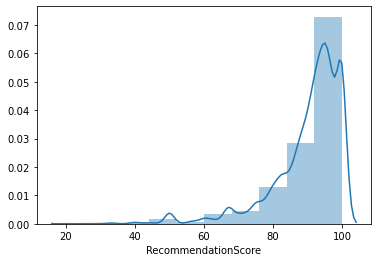

In [193]:
sns.distplot(food_list_clean['RecommendationScore'],bins=10,norm_hist=True);

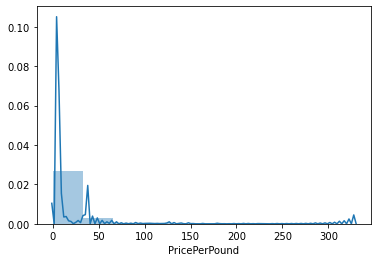

In [194]:
sns.distplot(food_list_clean['PricePerPound'],bins=10,norm_hist=True);

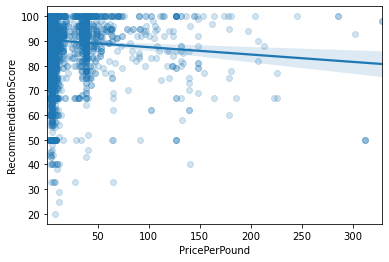

In [195]:
sns.regplot(x="PricePerPound", y="RecommendationScore", data=food_list_clean,scatter_kws={'alpha':0.2})

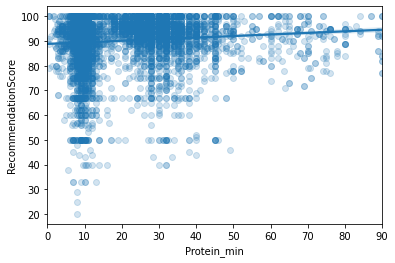

In [196]:
sns.regplot(x="Protein_min", y="RecommendationScore", data=food_list_clean,scatter_kws={'alpha':0.2})

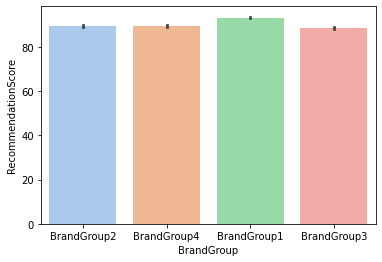

In [197]:
with sns.color_palette("pastel"):
    score_brandgroup = food_list_clean.groupby('BrandGroup')['RecommendationScore'].mean().reset_index()
    sns.barplot(x="BrandGroup", y="RecommendationScore", data=food_list_clean)

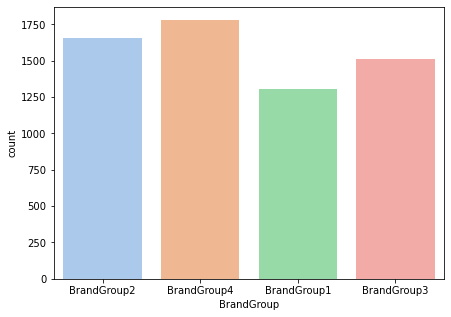

In [198]:
plt.figure(figsize=(7,5))
with sns.color_palette("pastel"):
    sns.countplot(food_list_clean['BrandGroup']);

In [199]:
food_type_dic = {
    'FoodType':['Treats','DryFood','WetFood','FreezeDried','FoodTopping','Dehydrated','AirDried','Frozen'],
    'Count': [food_list_clean['Treats'].sum(),food_list_clean['DryFood'].sum(),food_list_clean['WetFood'].sum(),
    food_list_clean['FreezeDried'].sum(),food_list_clean['FoodTopping'].sum(),food_list_clean['Dehydrated'].sum(),
    food_list_clean['AirDried'].sum(),food_list_clean['Frozen'].sum()]
}


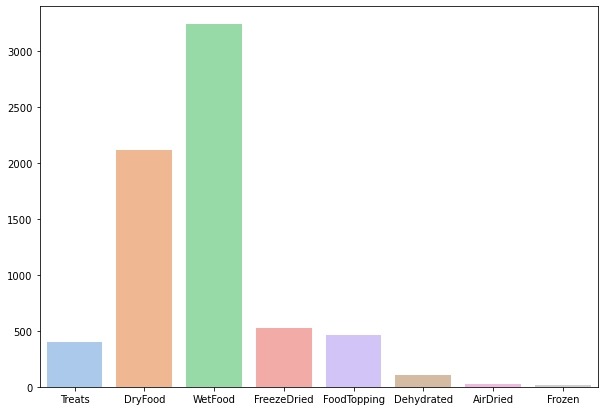

In [200]:
plt.figure(figsize=(10,7))
with sns.color_palette("pastel"):
    sns.barplot(x='FoodType',y='Count',data=food_type_dic)

In [201]:
life_stage_dic = {
    'LifeStage':['Adult','Puppy/Kitten','Senior'],
    'Count': [food_list_clean['Adult'].sum(),food_list_clean['PuppyOrKitten'].sum(),food_list_clean['Senior'].sum()]
}

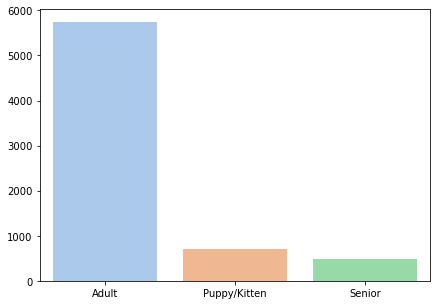

In [202]:
plt.figure(figsize=(7,5))
with sns.color_palette("pastel"):
    sns.barplot(x='LifeStage',y='Count',data=life_stage_dic)